In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


wins [12, 16, 17, 14, 13, 18, 15]
Accuracy has 3500 values
Composer has 3500 values
algo has 3500 values
folds has 3500 values
0.2184633027522936


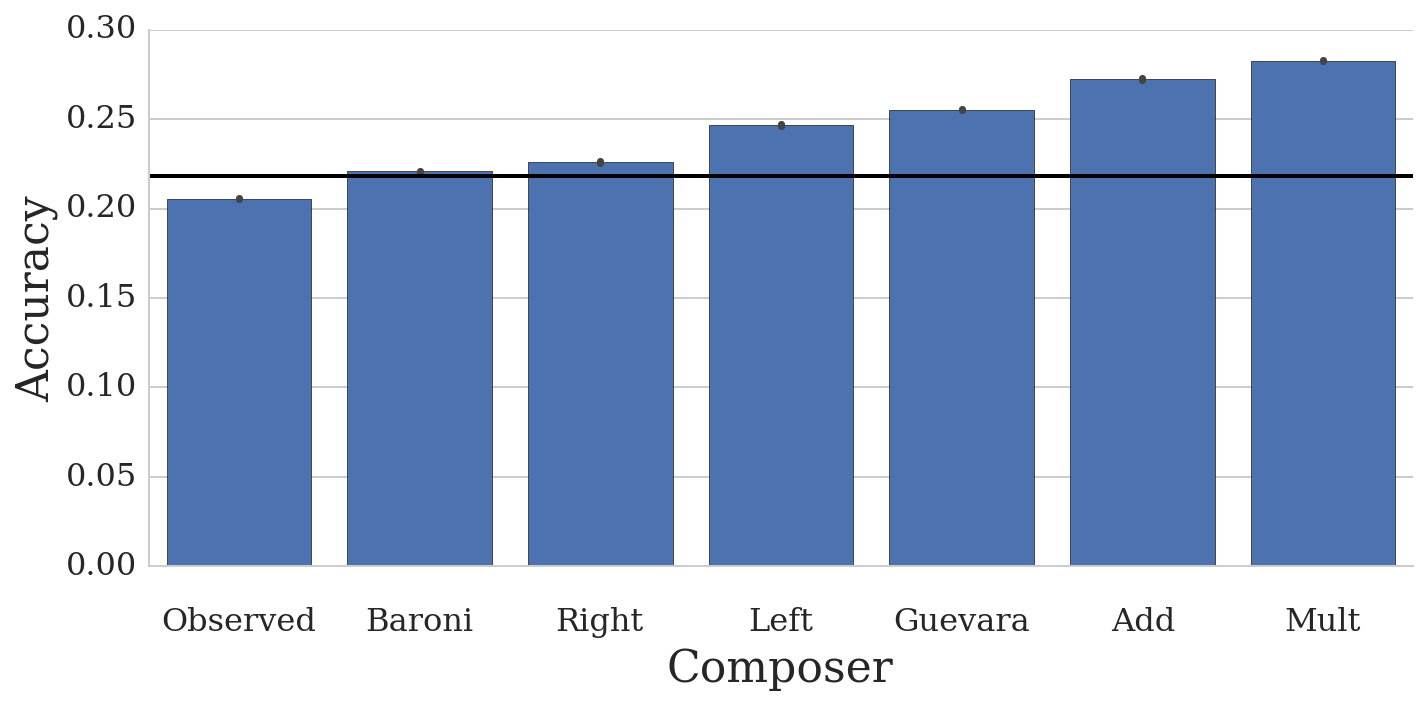

In [2]:
d1 = {
    'document_features_ev': 'AN+NN',
    'document_features_tr': 'J+N+AN+NN',
    'labelled': 'amazon_grouped-tagged',
    'expansions__allow_overlap': 0,
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm': 'count_windows',
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled': 'gigaw',
    'expansions__vectors__unlabelled_percentage': 100
     }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

wins = _get(d1)
print('wins', wins)
fields_to_include = {'algo':'expansions__vectors__algorithm', 
                     'Composer':'expansions__vectors__composer'}
df = dataframe_from_exp_ids(wins, fields_to_include)

g = sns.factorplot(x='Composer', y='Accuracy', data=df, kind='bar',
                  x_order=sort_df_by(df, 'Composer'), aspect=2);
# g.set_xticklabels(rotation=60);
plt.axhline(random_vect_baseline(), color='black');
print(random_vect_baseline())
g.savefig('plot-windows-funky-composers.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [3]:
df.head()

,Accuracy,Composer,algo,folds
0,0.257342,Add,W,0
1,0.258927,Add,W,1
2,0.259772,Add,W,2
3,0.260300,Add,W,3
4,0.260406,Add,W,4


In [4]:
def f1(x):
    return '%1.2f' % x

ddf = df.drop('folds', axis=1).groupby('Composer').agg([np.mean, np.std])
ddf.columns = ddf.columns.droplevel(0)
ddf = ddf.sort('mean')
# print(ddf.to_latex())
ddf.columns, ddf.index

(Index(['mean', 'std'], dtype='object'),
 Index(['Observed', 'Baroni', 'Right', 'Left', 'Guevara', 'Add', 'Mult'], dtype='object', name='Composer'))

In [5]:
ddf['Accuracy'] = ddf['mean'].map(f1) + "$\pm$" + ddf['std'].map(f1)
ddf = ddf.drop(['mean', 'std'], axis=1)#.reset_index()#.sort()
print(ddf.to_latex(float_format=f1, escape=False))

# ddf = df.drop('folds', axis=1).groupby('Composer').agg('mean').reset_index() # no need to drop unwanted columns
# print(ddf.to_latex(float_format=f1))

ddf

\begin{tabular}{ll}
\toprule
{} &       Accuracy \\
\midrule
Composer &                \\
Observed &  0.21$\pm$0.00 \\
Baroni   &  0.22$\pm$0.00 \\
Right    &  0.23$\pm$0.01 \\
Left     &  0.25$\pm$0.01 \\
Guevara  &  0.26$\pm$0.00 \\
Add      &  0.27$\pm$0.00 \\
Mult     &  0.28$\pm$0.00 \\
\bottomrule
\end{tabular}



,Accuracy
Composer,
Observed,0.21$\pm$0.00
Baroni,0.22$\pm$0.00
Right,0.23$\pm$0.01
Left,0.25$\pm$0.01
Guevara,0.26$\pm$0.00
Add,0.27$\pm$0.00
Mult,0.28$\pm$0.00
